In [42]:
%matplotlib inline
import pandas as pd

In [3]:
tmdb = pd.read_csv("dados/tmdb_5000_movies.csv")

In [5]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [157]:
import matplotlib.pyplot as plt
import seaborn as sns


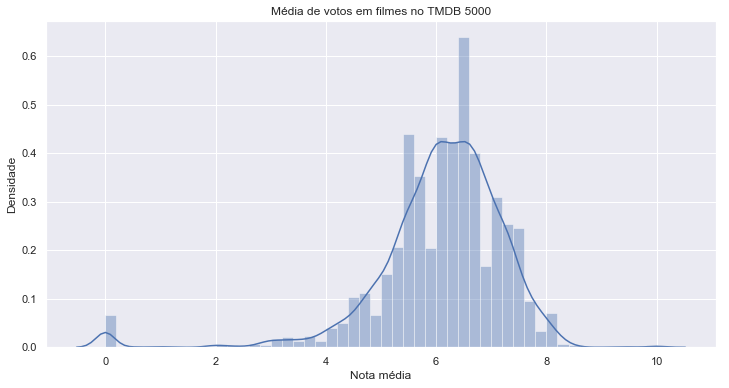

In [158]:
ax = sns.distplot(tmdb.vote_average)
ax.set(xlabel="Nota média", ylabel="Densidade")
ax.set_title("Média de votos em filmes no TMDB 5000")
ax.figure.set_size_inches(12,6)

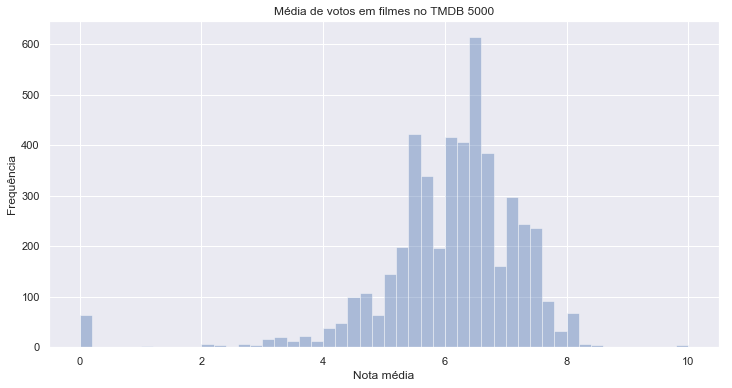

In [160]:
ax = sns.distplot(tmdb.vote_average,norm_hist=False, kde=False)
ax.set(xlabel="Nota média", ylabel="Frequência")
ax.set_title("Média de votos em filmes no TMDB 5000")
ax.figure.set_size_inches(12,6)

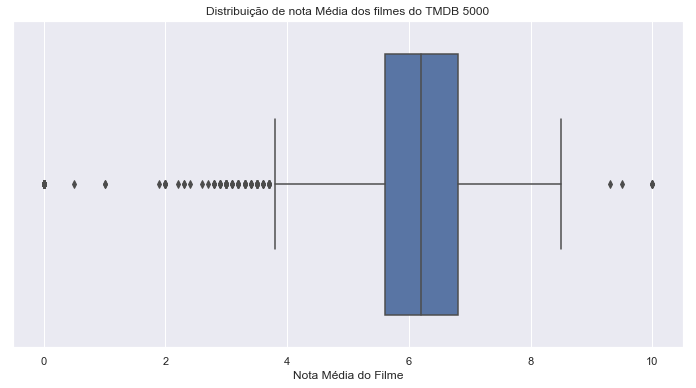

In [161]:
sns.set()
ax = sns.boxplot(x=tmdb.vote_average)
ax.set(xlabel="Nota Média do Filme")
ax.set_title("Distribuição de nota Média dos filmes do TMDB 5000")
ax.figure.set_size_inches(12,6)

Muitos filmes com média 0 ou 10. Não é comum. Pode ser que ninguém tenha votado ou pouca gente votou e todo mundo deu 0. Esses filmes não pertencerão à nossa análise. Pegaremos somente os filmes com dez ou mais votos.

In [35]:
tmdb.query("vote_average==0").head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-05-13,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-04-28,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",NaN,447027,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-10-27,0,88.0,[],Released,NaN,Running Forever,0.0,0
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,395766,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.042346,[],[],2016-04-29,0,200.0,[],Released,NaN,The Secret,0.0,0
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.timetochoose.com,370662,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-09-04,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Climate change for good.,Time to Choose,0.0,0


In [38]:
tmdb_mais_de_10_votos = tmdb.query("vote_count >= 10")

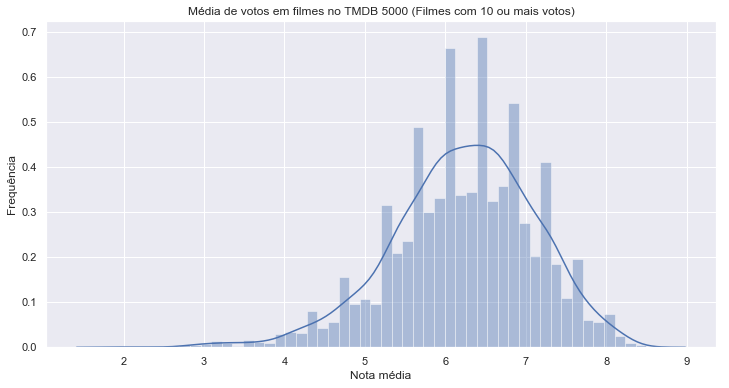

In [162]:
ax = sns.distplot(tmdb_mais_de_10_votos.vote_average)
ax.set(xlabel="Nota média", ylabel="Frequência")
ax.set_title("Média de votos em filmes no TMDB 5000 (Filmes com 10 ou mais votos)")
ax.figure.set_size_inches(12,6)

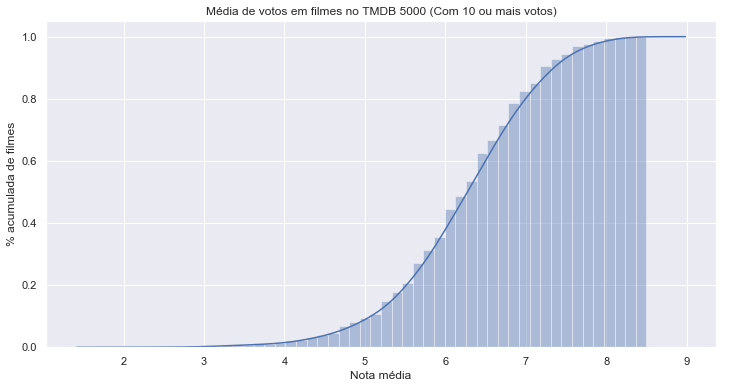

In [163]:
ax = sns.distplot(tmdb_mais_de_10_votos.vote_average, 
                  hist_kws ={"cumulative":True},
                  kde_kws ={"cumulative":True})
ax.set(xlabel="Nota média", ylabel="% acumulada de filmes")
ax.set_title("Média de votos em filmes no TMDB 5000 (Com 10 ou mais votos)")
ax.figure.set_size_inches(12,6)

Analisaremos também o dataset do movielens:

In [53]:
notas = pd.read_csv("dados/ratings.csv")

In [55]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [58]:
nota_media_por_filme = notas.groupby("movieId").mean()["rating"]

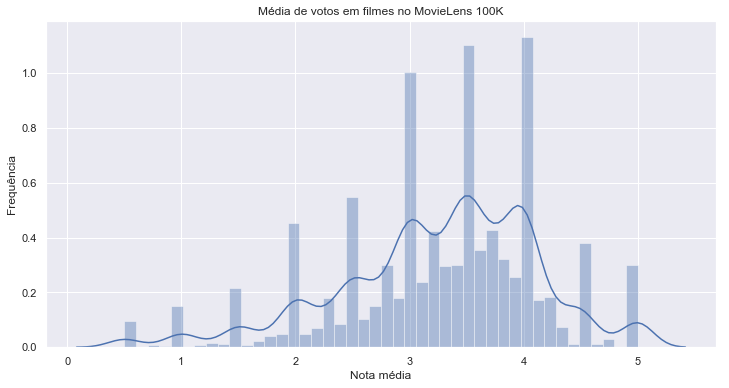

In [164]:
ax = sns.distplot(nota_media_por_filme.values)
ax.set(xlabel="Nota média", ylabel="Frequência")
ax.set_title("Média de votos em filmes no MovieLens 100K")
ax.figure.set_size_inches(12,6)

In [62]:
quantidade_de_votos_por_filme = notas.groupby("movieId").count()

In [64]:
quantidade_de_votos_por_filme.head()

,userId,rating,timestamp
movieId,,,
1,215,215,215
2,110,110,110
3,52,52,52
4,7,7,7
5,49,49,49


In [65]:
filmes_com_pelo_menos_10_votos = quantidade_de_votos_por_filme.query("rating >= 10").index

In [68]:
filmes_com_pelo_menos_10_votos.values

array([     1,      2,      3, ..., 177765, 179819, 187593], dtype=int64)

In [70]:
nota_media_por_filme_com_pelo_menos_10_votos = nota_media_por_filme.loc[filmes_com_pelo_menos_10_votos.values]

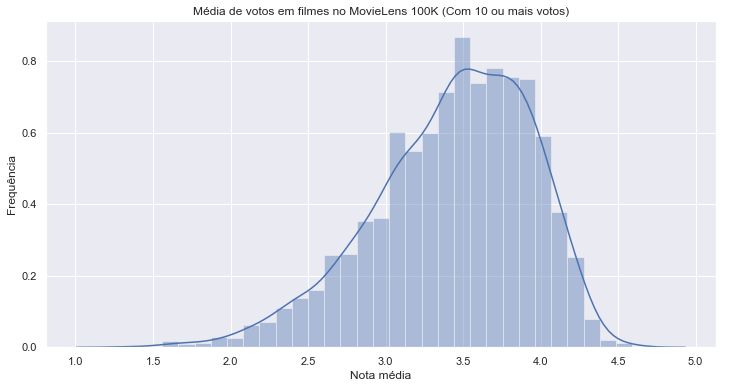

In [165]:
ax = sns.distplot(nota_media_por_filme_com_pelo_menos_10_votos.values)
ax.set(xlabel="Nota média", ylabel="Frequência")
ax.set_title("Média de votos em filmes no MovieLens 100K (Com 10 ou mais votos)")
ax.figure.set_size_inches(12,6)

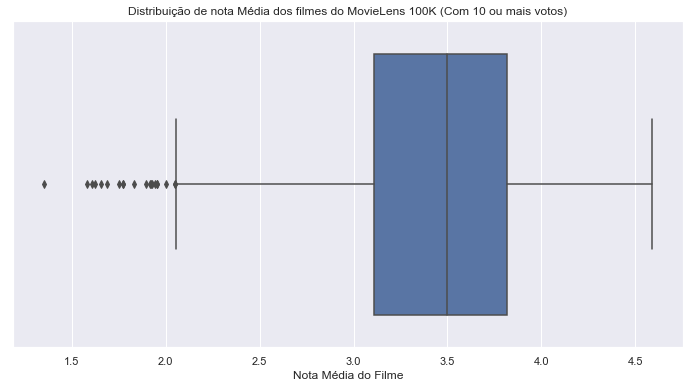

In [166]:
sns.set()
ax = sns.boxplot(x=nota_media_por_filme_com_pelo_menos_10_votos.values)
ax.set(xlabel="Nota Média do Filme")
ax.set_title("Distribuição de nota Média dos filmes do MovieLens 100K (Com 10 ou mais votos)")
ax.figure.set_size_inches(12,6)

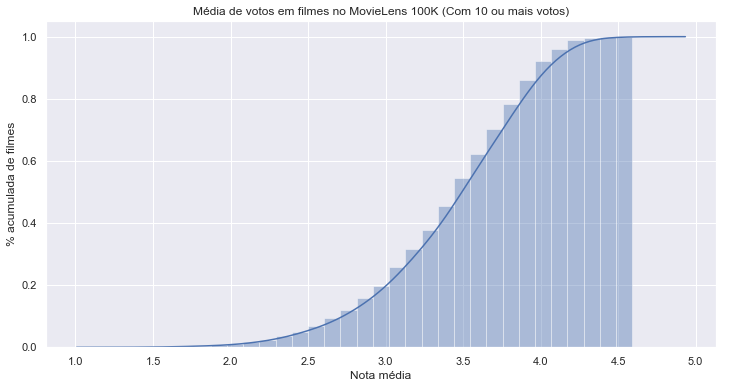

In [167]:
ax = sns.distplot(nota_media_por_filme_com_pelo_menos_10_votos.values, 
                  hist_kws ={"cumulative":True},
                  kde_kws ={"cumulative":True})
ax.set(xlabel="Nota média", ylabel="% acumulada de filmes")
ax.set_title("Média de votos em filmes no MovieLens 100K (Com 10 ou mais votos)")
ax.figure.set_size_inches(12,6)

# Analisando a distribuição dos dados capturados de outros campos do TMDB

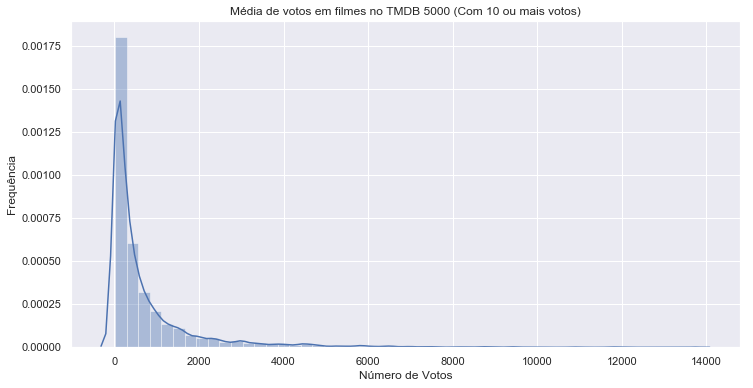

In [168]:
ax = sns.distplot(tmdb_mais_de_10_votos.vote_count)
ax.set(xlabel="Número de Votos", ylabel="Frequência")
ax.set_title("Média de votos em filmes no TMDB 5000 (Com 10 ou mais votos)")
ax.figure.set_size_inches(12,6)

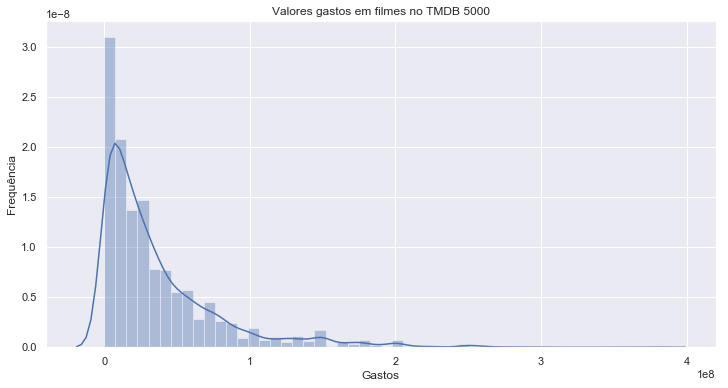

In [169]:
ax = sns.distplot(tmdb.query("budget > 0").budget)
ax.set(xlabel="Gastos", ylabel="Frequência")
ax.set_title("Valores gastos em filmes no TMDB 5000")
ax.figure.set_size_inches(12,6)

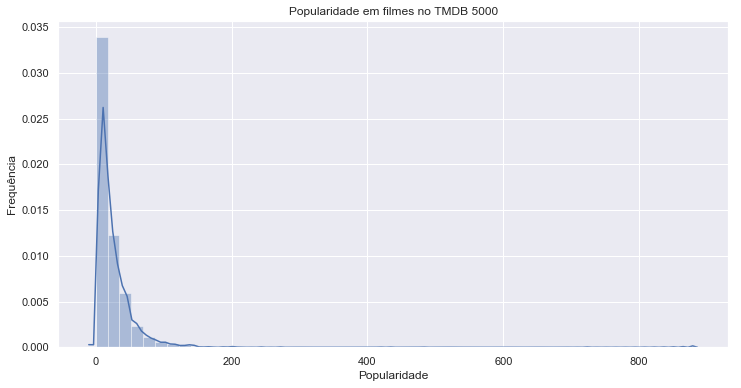

In [170]:
ax = sns.distplot(tmdb.popularity)
ax.set(xlabel="Popularidade", ylabel="Frequência")
ax.set_title("Popularidade em filmes no TMDB 5000")
ax.figure.set_size_inches(12,6)

In [91]:
tmdb.runtime.isnull().sum()

2

Text(0.5, 1.0, 'Duração em filmes no TMDB 5000')

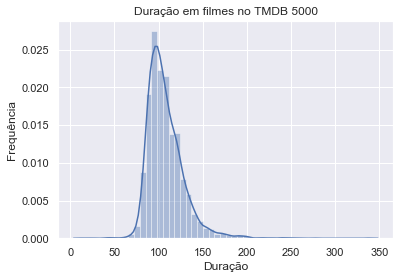

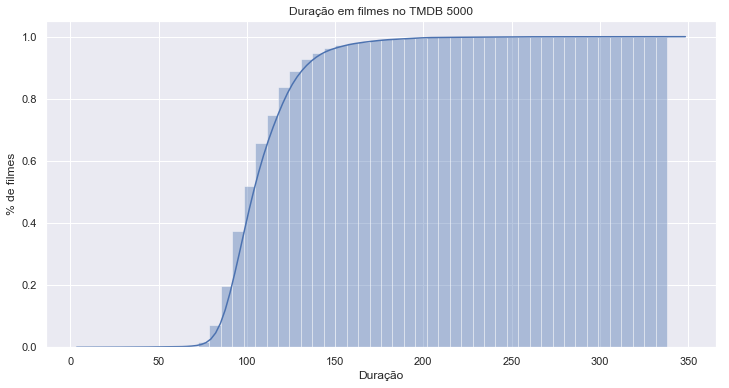

In [171]:
ax = sns.distplot(tmdb.query("runtime > 0").runtime.dropna(),
                 hist_kws ={"cumulative":True},
                  kde_kws ={"cumulative":True})
ax.set(xlabel="Duração", ylabel="% de filmes")
ax.set_title("Duração em filmes no TMDB 5000")
ax.figure.set_size_inches(12,6)

In [99]:
tmdb.query("runtime > 0").runtime.dropna().quantile(0.8)

121.0

# Movielens: média dos filmes com pelo menos 10 votos

In [101]:
print("Média dos filmes com pelo menos 10 votos", nota_media_por_filme_com_pelo_menos_10_votos.mean())

Média dos filmes com pelo menos 10 votos 3.4320503405352603


In [107]:
medias = list()

for i in range(1,len(nota_media_por_filme_com_pelo_menos_10_votos)):
    medias.append(nota_media_por_filme_com_pelo_menos_10_votos[0:i].mean())

In [108]:
medias

[3.9209302325581397,
 3.676374207188161,
 3.5374545996639024,
 3.4209480926050695,
 3.5259741603585653,
 3.469175997829668,
 3.420007998139716,
 3.4295335135237663,
 3.4564107421798558,
 3.352874931119765,
 3.396552967684635,
 3.363506887044249,
 3.406839377909513,
 3.4332165225577675,
 3.451002087720583,
 3.405769002692592,
 3.3524884731224396,
 3.3603714480862994,
 3.3531004361987162,
 3.3416954143887807,
 3.331376585132172,
 3.3447231039898004,
 3.3514742733815486,
 3.3879658756270143,
 3.412973556391407,
 3.404174978311576,
 3.425614825316986,
 3.4337122869128076,
 3.4475781010027933,
 3.4424344719950075,
 3.4507430374145236,
 3.4223910131474935,
 3.4190609824460543,
 3.4086964437466603,
 3.4248871013004156,
 3.4171696491401096,
 3.4393473639752203,
 3.4400036363518125,
 3.4550555181639973,
 3.4495614831510744,
 3.455822178683975,
 3.433832556918074,
 3.441766683501375,
 3.4432967795375005,
 3.4437021502486327,
 3.4427521035040973,
 3.4283255881604555,
 3.4216342812642555,
 3.43275

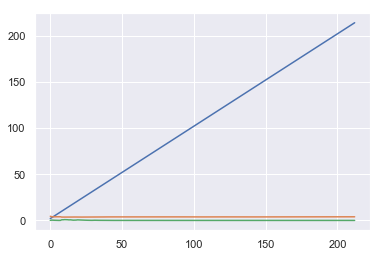

In [173]:
plt.plot(medias)


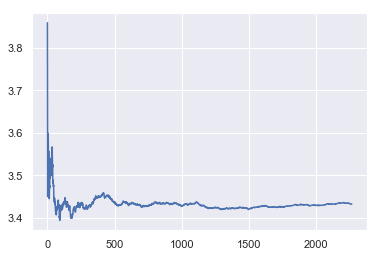

In [176]:
import numpy as np

np.random.seed(75243)
temp = nota_media_por_filme_com_pelo_menos_10_votos.sample(frac=1)
medias = list()
for i in range(1,len(nota_media_por_filme_com_pelo_menos_10_votos)):
    medias.append(temp[0:i].mean())

plt.plot(medias)
ax.figure.set_size_inches(12,6)

Refatorando

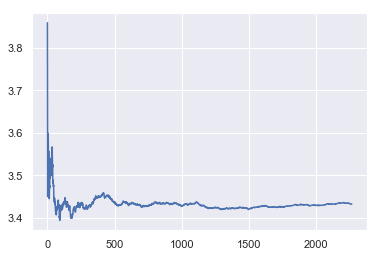

In [118]:
import numpy as np

np.random.seed(75243)
temp = nota_media_por_filme_com_pelo_menos_10_votos.sample(frac=1)
medias = list()
medias = [temp[0:i].mean() for i in range(1,len(temp))]
    

plt.plot(medias)

In [135]:
from statsmodels.stats.weightstats import zconfint, DescrStatsW, ztest

zconfint(nota_media_por_filme_com_pelo_menos_10_votos)

(3.4112459477469557, 3.452854733323563)

In [122]:
desc_todos_com_10_votos = DescrStatsW(nota_media_por_filme_com_pelo_menos_10_votos)

In [123]:
desc_todos_com_10_votos.tconfint_mean() #Ttest

(3.41123483922938, 3.4528658418411386)

# Vamos ver o filme 1...

In [125]:
filmes = pd.read_csv("dados/movies.csv")

In [127]:
notas1 = notas.query("movieId == 1")
notas1.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


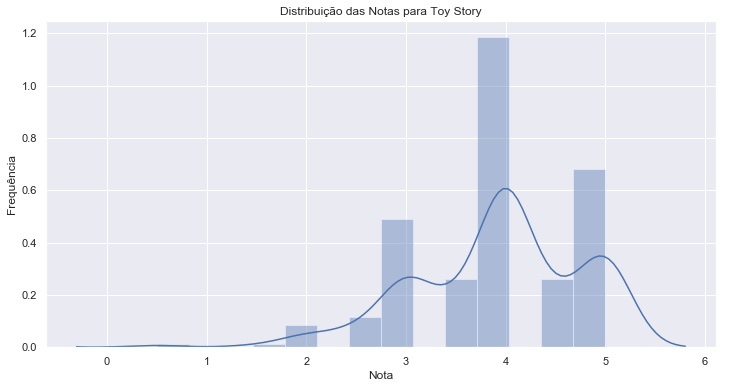

In [177]:
ax = sns.distplot(notas1.rating)
ax.set(xlabel="Nota", ylabel="Frequência")
ax.set_title("Distribuição das Notas para Toy Story")
ax.figure.set_size_inches(12,6)

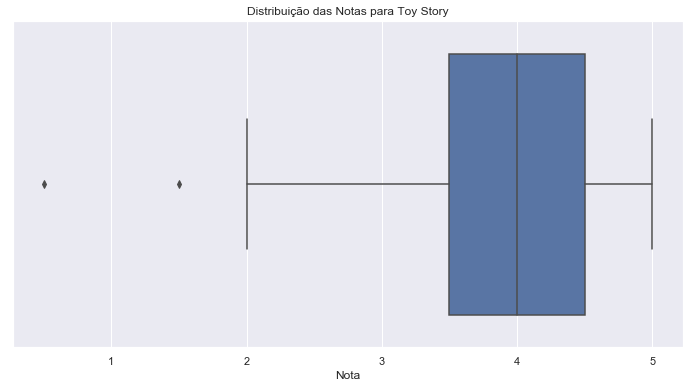

In [178]:
ax = sns.boxplot(notas1.rating)
ax.set(xlabel="Nota")
ax.set_title("Distribuição das Notas para Toy Story")
ax.figure.set_size_inches(12,6)

In [131]:
notas1.rating.mean()

3.9209302325581397

In [132]:
notas1.rating.count()

215

In [134]:
zconfint(notas1.rating) #intervalo de confiança

(3.8093359183563402, 4.032524546759939)

In [137]:
ztest(notas1.rating, value = 3.4320503405352603)

(8.586342305916716, 8.978190401886942e-18)

No ztest, utilizamos a hipótese nula (H0)  de que a média do toy story é igual a média dos demais filmes (3.4320503405352603). Como o valor deu 8.978190401886942e-18 e esse valor é bem menor que o geralmente utilizado, 0.05, podemos descartar a H0. Ou seja, a média de Toy Story não é igual a dos demais.

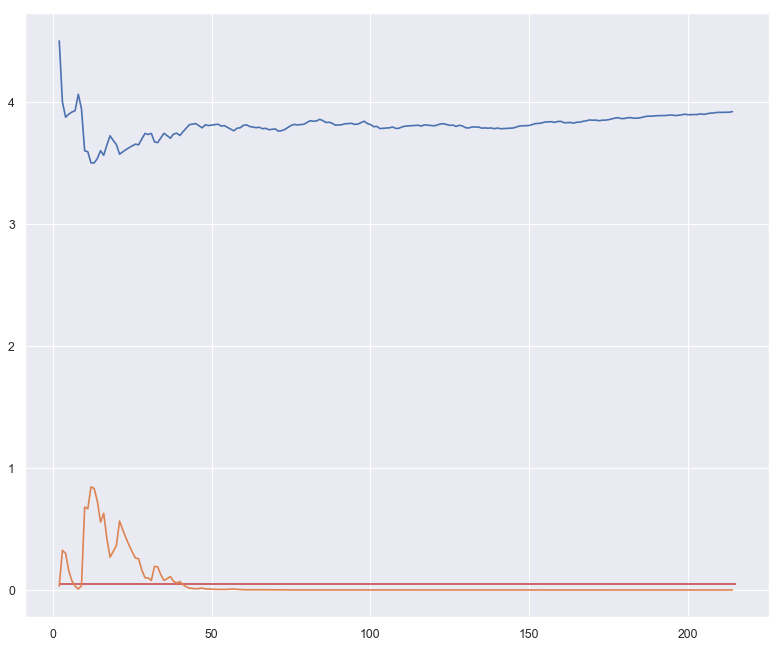

In [182]:
np.random.seed(75241)
temp = notas1.sample(frac=1).rating

def calcula_teste(i):
    media = temp[0:i].mean()
    stat, p = ztest(temp[0:i], value = 3.4320503405352603)
    return (i, media, p)

valores = np.array([calcula_teste(i) for i in range(2,len(temp))])
medias
plt.figure(figsize=(12, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(valores[:,0],valores[:,1])
plt.plot(valores[:,0],valores[:,2])
plt.hlines(y=0.05, xmin=2,xmax=len(temp),colors='r')


Comparação de dois conjuntos de amostras

In [184]:
print(ztest(notas1.rating,notas.rating))
zconfint(notas1.rating,notas.rating)

(5.894327101501841, 3.762112778881965e-09)


(0.2799245129192442, 0.5588219849631111)

In [185]:
from scipy.stats import ttest_ind

ttest_ind(notas1.rating,notas.rating)

Ttest_indResult(statistic=5.894327101501841, pvalue=3.774003138720876e-09)

In [187]:
descr_todas_as_notas = DescrStatsW(notas.rating)
descr_toy_story = DescrStatsW(notas1.rating)
comparacao = descr_todas_as_notas.get_compare(descr_toy_story)
comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.4194,0.071,-5.894,0.000,-0.559,-0.280


In [188]:
comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.4194,0.071,-5.894,0.000,-0.559,-0.280


Text(0.5, 1.0, 'Distribuição das notas de acordo com filmes')

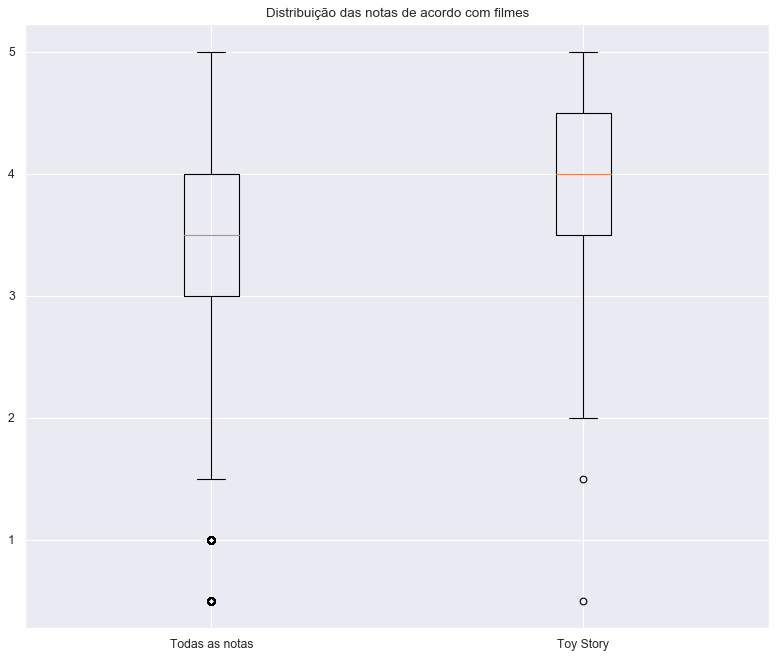

In [193]:
plt.figure(figsize=(12, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.boxplot([notas.rating,notas1.rating],labels=["Todas as notas","Toy Story"])
plt.title("Distribuição das notas de acordo com filmes")

Text(0.5, 1.0, 'Distribuição das notas de acordo com filmes')

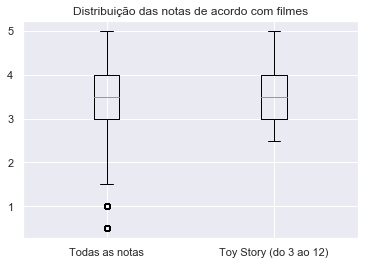

In [194]:
plt.boxplot([notas.rating, notas1[3:12].rating], labels=["Todas as notas", "Toy Story (do 3 ao 12)"])
plt.title("Distribuição das notas de acordo com filmes")

# Comparar a média de dois filmes

In [197]:
filmes.query("movieId in [1,593,72226]")

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
7180,72226,Fantastic Mr. Fox (2009),Adventure|Animation|Children|Comedy|Crime


Text(0.5, 1.0, 'Distribuição das notas de acordo com os filmes')

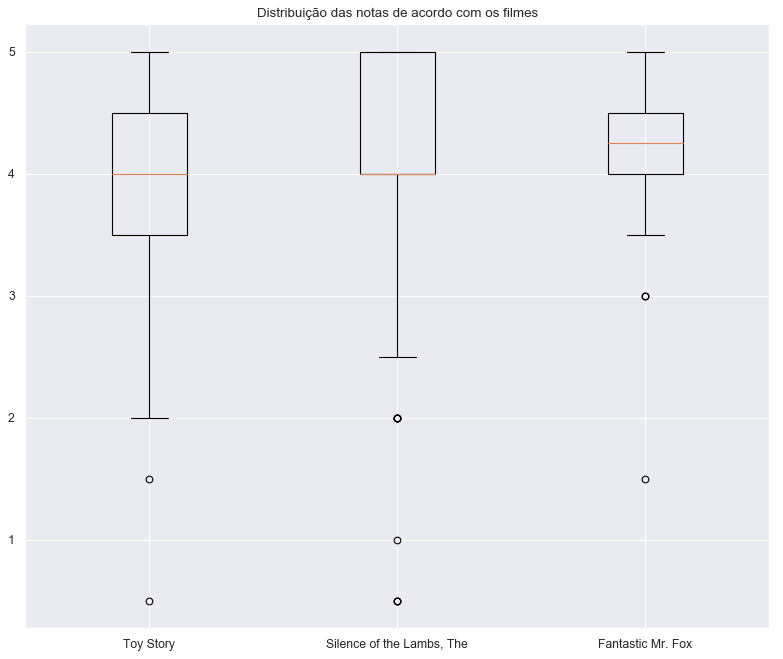

In [200]:
notas593 = notas.query("movieId == 593")
notas72226 = notas.query("movieId == 72226")
plt.figure(figsize=(12, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.boxplot([notas1.rating,notas593.rating, notas72226.rating], labels=["Toy Story","Silence of the Lambs, The", "Fantastic Mr. Fox"])
plt.title("Distribuição das notas de acordo com os filmes")

In [201]:
notas72226.describe()

,userId,movieId,rating,timestamp
count,18.000000,18.0,18.000000,1.800000e+01
mean,329.722222,72226.0,4.083333,1.395218e+09
std,174.748157,0.0,0.895249,9.459862e+07
min,73.000000,72226.0,1.500000,1.262899e+09
25%,167.000000,72226.0,4.000000,1.279706e+09
50%,326.000000,72226.0,4.250000,1.441777e+09
75%,466.250000,72226.0,4.500000,1.471770e+09
max,610.000000,72226.0,5.000000,1.498522e+09


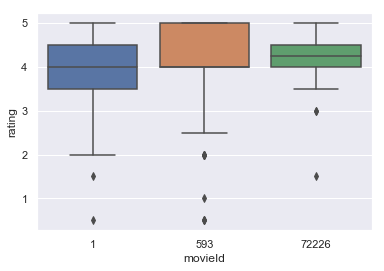

In [202]:
sns.boxplot(x="movieId", y="rating",data = notas.query("movieId in (1, 593, 72226)"))

In [203]:
descr_1 = DescrStatsW(notas1.rating)
descr_593 = DescrStatsW(notas593.rating)
comparacao = descr_1.get_compare(descr_593)
comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.2404,0.077,-3.132,0.002,-0.391,-0.090


In [204]:
descr_72226 = DescrStatsW(notas72226.rating)
descr_593 = DescrStatsW(notas593.rating)
comparacao = descr_72226.get_compare(descr_593)
comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,-0.0780,0.208,-0.374,0.708,-0.488,0.332


In [205]:
comparacao = descr_72226.get_compare(descr_1)
comparacao.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,0.1624,0.206,0.788,0.431,-0.243,0.568


In [207]:
notas.query("movieId in [1,593,72226]").groupby("movieId").count()

,userId,rating,timestamp
movieId,,,
1,215,215,215
593,279,279,279
72226,18,18,18


In [208]:
from scipy.stats import normaltest

stat,p = normaltest(notas1.rating)
p

0.00011053430732728716

In [209]:
_,p = normaltest(notas1.rating)
p

0.00011053430732728716

In [211]:
from scipy.stats import ranksums

_,p = ranksums(notas1.rating,notas593.rating)
p

0.0003267718756440693